# Visualizing and fitting models on abalone dataset

* Goal: Explore, visualize, analyze and fit models. <br>
* Dataset   : Abalone <br>
* Source    : UC Irvine Machine Learning Repository (http://archive.ics.uci.edu/ml/) <br>
* Libraries : numpy, pandas, seaborn, matplotlib <br>
* Summary   : This notebook will be used to show some common series of steps followed for fitting linear regresssion models on a dataset. Specifically Exploration, visualization, and analysis of this visualizations will be a key goal of this notebook

## Step 1 : Import necessary libraries

In [1]:
"""
First of all we will import necessary packages required for our tasks of exploration,
visualization, analysis and fitting models and measuring how good they are.
"""
#Import numpy and pandas
import numpy as np
import pandas as pd

#Import seaborn and matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt
#Below line is used to make sure matplotlib plots all graphs on the same notebook
%matplotlib inline

#Current version of seaborn issues some warnings, we shall ignore them for now
import warnings
warnings.filterwarnings("ignore")

## Step 2 : Load dataset

In [2]:
"""
Load data in abalone_df Pandas DataFrame
We use delimeter= " " because in the dataset the columns are separated using " "
Also we specify names of the column explicitly to ease our understanding.
"""
abalone_df = pd.read_csv("../../data/abalone/Dataset.data", delimiter=" ",
                         names=['Sex', 'Length', 'Diameter', 'Height', 
                                'Whole weight', 'Shucked weight', 'Viscera weight',
                                'Shell weight', 'Rings'])

## Step 3 : Start exploring dataset

In [3]:
#First of all lets look how big the dataset is using len function
print "Number of Observations in the dataset : " + str(len(abalone_df))

Number of Observations in the dataset : 4177


In [4]:
#Now lets have a glimpse of first few rows of the dataset
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
"""
All the observations in the dataset are divided into Male (M), Female(F), and Infant(I)
shown in the Sex column of the dataset. Lets look how many observations of each class are
present in the dataset.
"""
abalone_df["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

## Step 4 : Let's start plotting using seaborn
For visualizing distributions of dataset, seaborn have three classes of functions, each one 
have specific role for plotting and each distributions have some key functions:
1. Univariate distrubutions : rugplot, kdeplot, distplot.
2. Bivariate distributions  : jointplot.
3. Pairwise distributions   : pairplot.

### Step 4.1 Univariate distributions
For Visualizaing univaraite distributions plots like rugplot, kdeplot and distplot are available. But here we will use distplot because we can make it plot the functionalities which we will need here, of rest 2 plots i.e. rugplots and kdeplot.

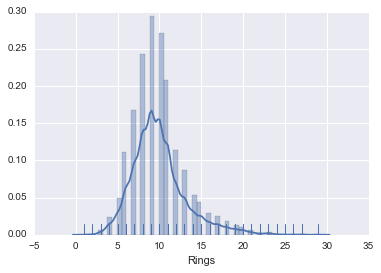

In [6]:
"""
We will plot univariate distribution for attribute Rings
seaborn have distplot() for plotting univariate distributions
Parameters : hist for plotting histogram.
           : kde for plotting curve for kernel density estimation.
           : rug for plotting ticks for observation values.
"""
sns.distplot(abalone_df["Rings"], hist=True, kde=True, rug=True)

### Step 4.2 Plotting bivariate distributions : jointplot
Bivariate distributions are used to represent bivariate (or joint) relationships between two variables. Function provided by the seaborn for performing such a operation is jointplot. Tweaking arguments of the jointplot one can either plot scatterplot, hexbinplot, or kdeplot. Also there are a lot of other features which one can tweak as an argument to jointplot, but we will use only a few for our purpose.

#### Step 4.2.1 Scatterplot : Similar to rugplot for univariate distribution

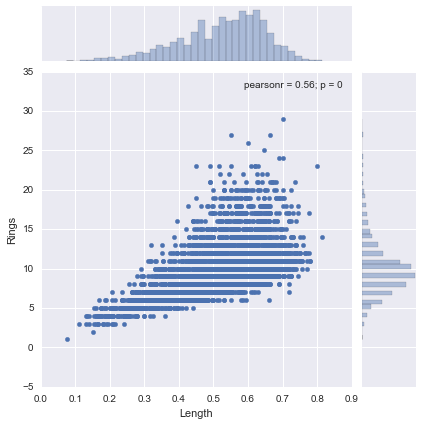

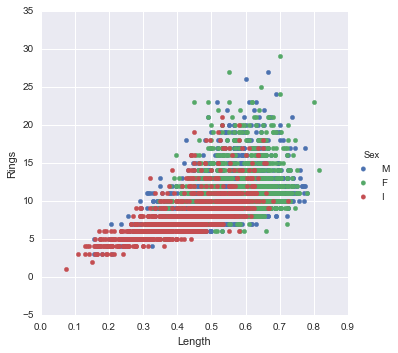

In [8]:
"""
Figure 1: "Length" on x axis and "Rings" on y axis.
           Each observation in the dataset in represented by a dot in the graph.
"""
#Figure 1
sns.jointplot(x="Length", y="Rings", data=abalone_df)
"""
Figure 1 plots a dot for each observation, but one can use Facet to further introduce one
more variable in the plot. We will discuss Facet in detail further in the notebook.
"""
#Figure 2
g = sns.FacetGrid(abalone_df, hue="Sex", size=5)
g.map(plt.scatter, "Length", "Rings")
g.add_legend()

#### Steps 4.2.2 Hexbinplot : Similar to histplot for univaraite distribution

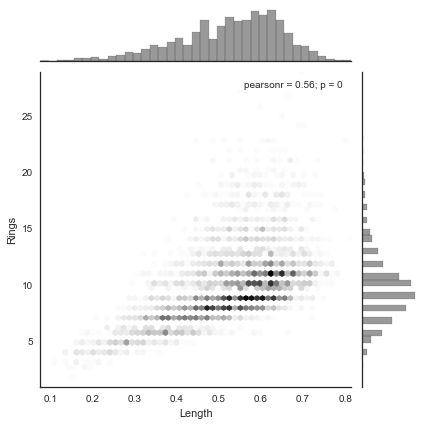

In [9]:
"""
We will plot bivariate distribution for Rings on x axis vs Length on y axis
In this plot each hexagonal represents one bin and color intensity represents
the number of observations in that bin.
Also this plot looks nice with white background
"""
with sns.axes_style("white"):
    sns.jointplot(x="Length", y="Rings", kind="hex", color="k", data=abalone_df)

#### Step 4.2.3 kdeplot : Similar to kdeplot for univariate distribution

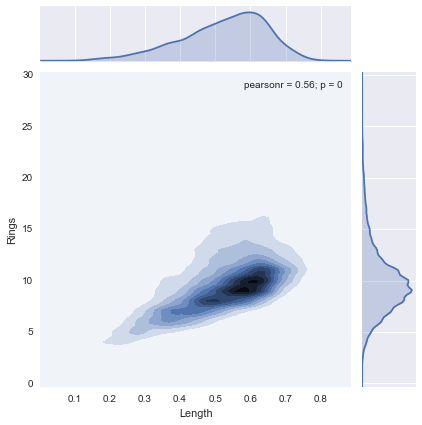

In [10]:
"""
We will plot bivaraite distribution for Length on x axis vs Rings on y axis
In this plot each the distribution is represented in forms of contours.
"""
sns.jointplot(x="Length", y="Rings", kind="kde", data=abalone_df)

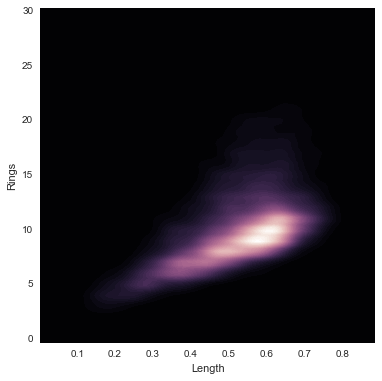

In [11]:
#One can also get bivaraite density more continiously, by increasing the number of contour levels
f, ax = plt.subplots(figsize=(6,6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(abalone_df["Length"], abalone_df["Rings"],  cmap=cmap, n_levels=60, shade=True)

### Step 4.3 Plotting pairwise relationships : pairplot

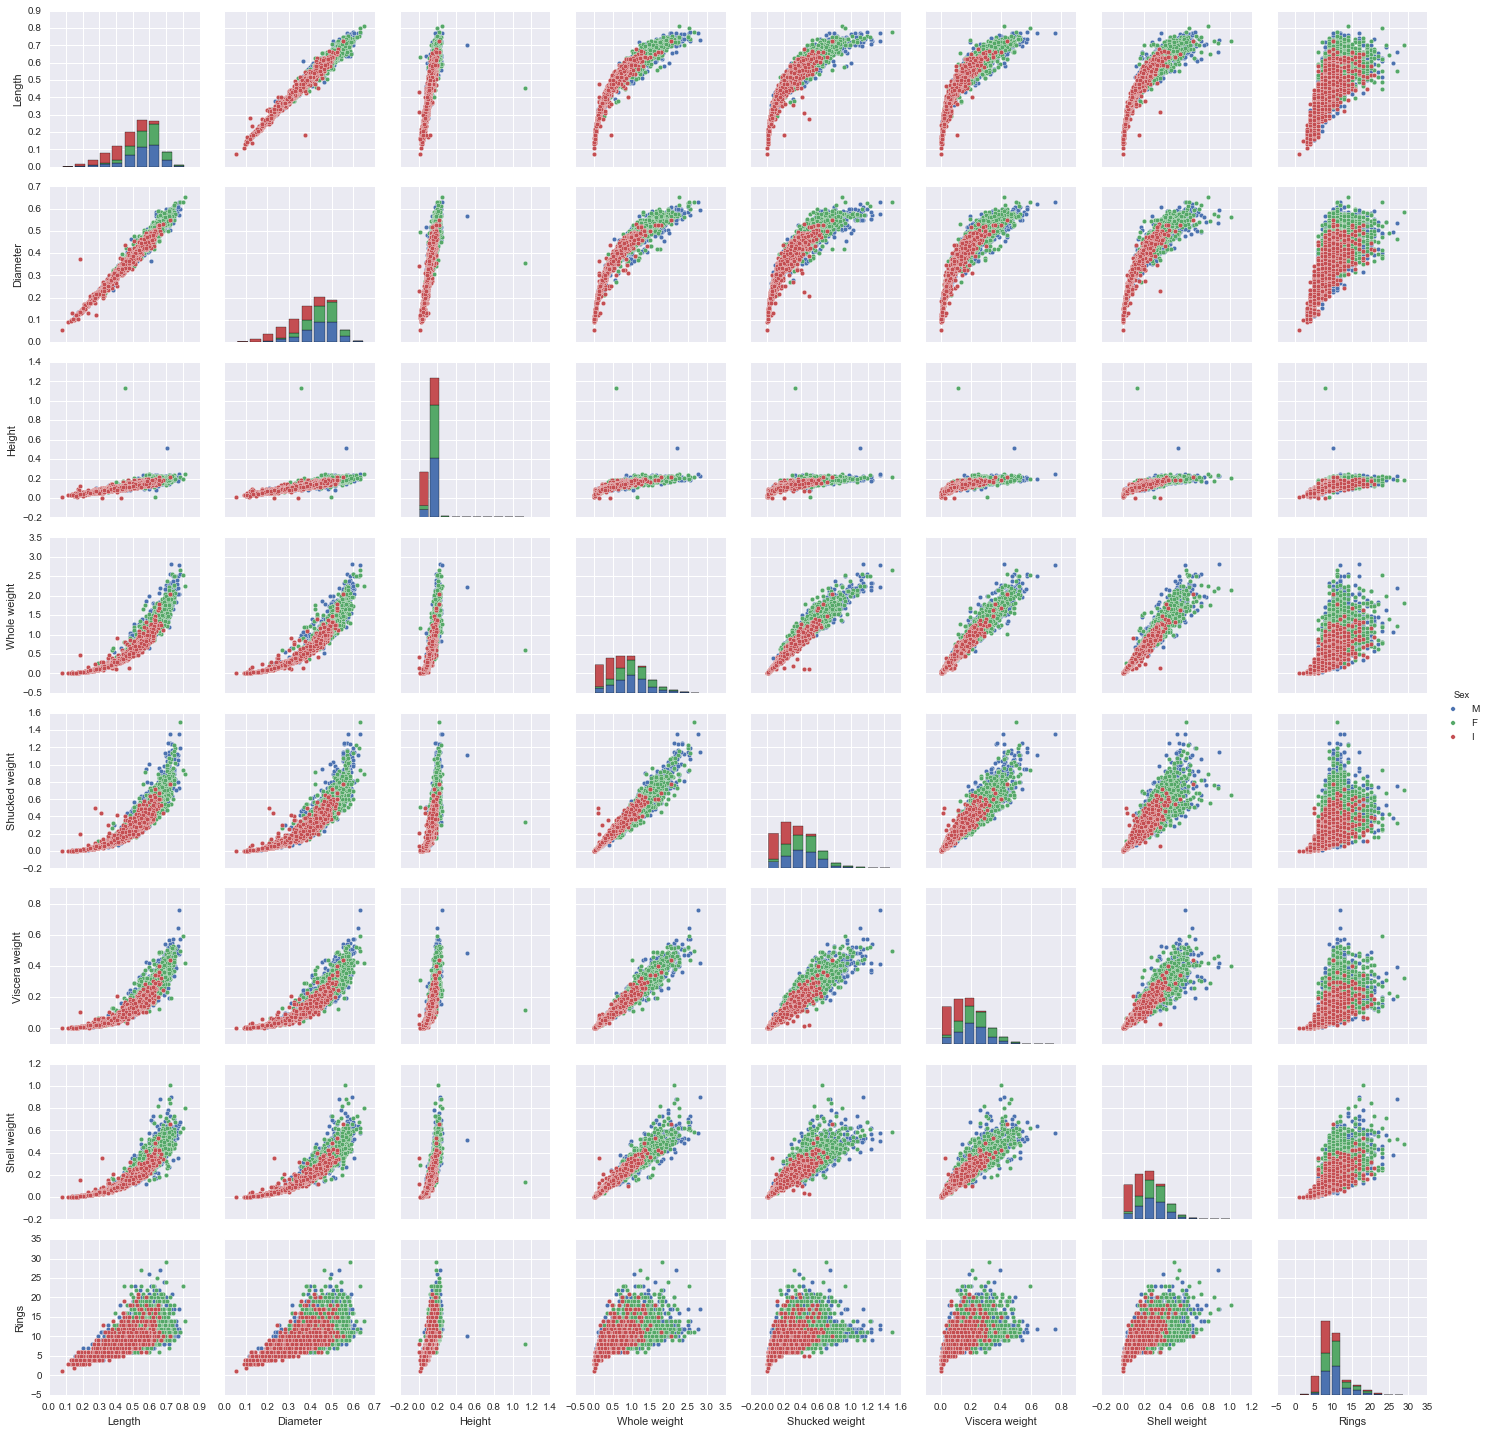

In [12]:
"""
PairPlots is used to visualize pairwise bivariate distributions of dataset.
Seaborn is smart enough to leave Sex field for plotting as it is String type
"""
sns.pairplot(abalone_df, hue="Sex")

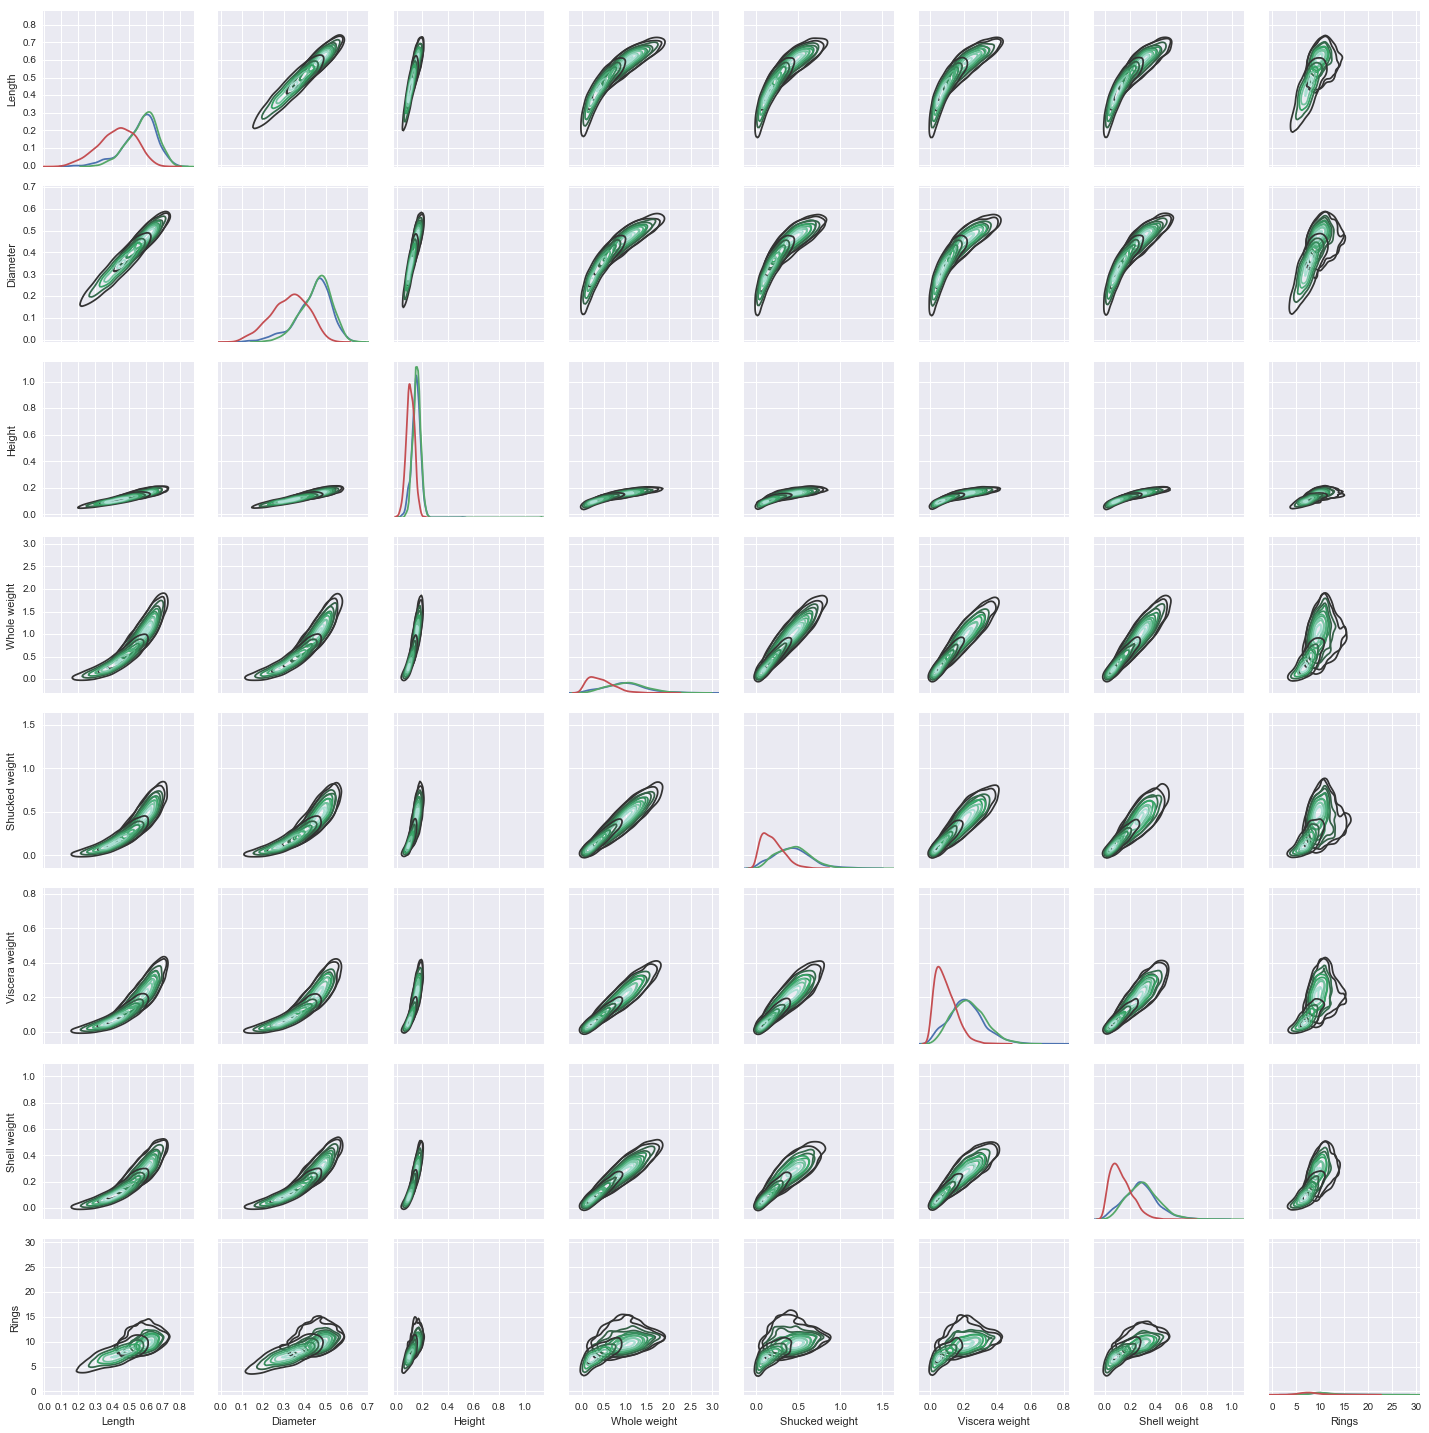

In [13]:
"""
pairplot returns an object of type PairGrid, one can directly use PairGrid in order to have
more flexibility in plotting
""" 
g = sns.PairGrid(abalone_df, hue="Sex")
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)

## Step 5 : Plot regression models using seaborn
First question I asked myself when I interacted with seaborn's linear regression plotting functions was : "Is it a subsitute of my pain? Because: Usually when I performed linear regression, I usually used numpy or other libraries to perform the stats and then use matplotlib to plot graphs. But seaborn can even fit models directly. Hell ya there is no need to learn all that concepts of linear regression in deep then!!!" Well the answer is no, because seaborn can not do everything complicated you can with stats libraries, well isn't it correct? Well seaborn provides some functions on your hand which you can use quickly to fit models on your dataset. Well I haven't exhaustively tested all the functions of seaborn but here lets use it for some quick model fitting on our dataset. Later in this notebook we will use numpy for helping us to fit model on data.

### Step 5.1 Plotting regression
seaborn have two functions for plotting regression regplot and implot. Although both these functions look quite similar in the first look, but there are quite a subtle differences between those two. For detailed differences please follow seaborn's documentation. seaborn can fit five different kind of regression models on dataset.
* Linear regression
* Polynomial regression
* Robust regression
* Logistic regression
* Non parameteric regression (Local regression)

#### Step 5.1.1 Plotting linear regression

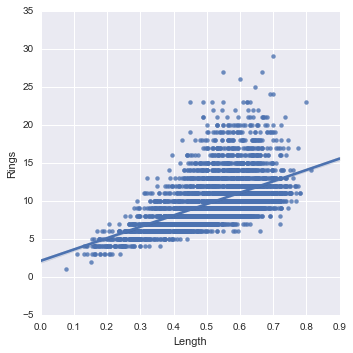

In [14]:
"""
We are using lmplot to fit a simple linear regression when keeping "Length" at x axis and 
"Rings" on y axis. lmplot first plots a scatter plot which we showed in the section of bivariate
analysis and show a dot for each observation in the dataset. Finally fits a line (linear regression)
on the dataset.
"""
sns.lmplot(x="Length", y="Rings", data=abalone_df)

#### Step 5.1.2 Plotting Polynomial regression

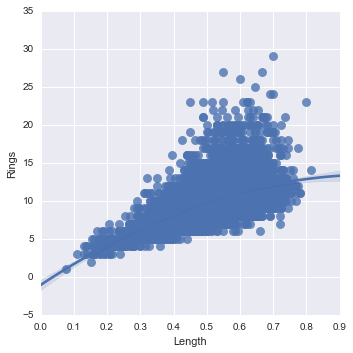

In [15]:
"""
Well lets try to fit a more complex model than simple linear regression, i.e. a model of order 2
on our dataset.
"""
sns.lmplot(x="Length", y="Rings", data=abalone_df, order=2, scatter_kws={"s": 80})

#### Step 5.1.3 Plotting Robust regression

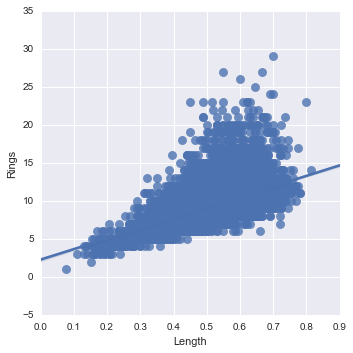

In [16]:
"""
Although the above fit looks nice but there are some outliers in the dataset as can be seen
near right top corners. In order to penalize such outliers we can use robust regression fit of
seaborn
"""
sns.lmplot(x="Length", y="Rings", data=abalone_df, robust=True, scatter_kws={"s": 80})

### Step 5.1.4 Plotting Logistic regression

### Step 5.2 Plot relationship between more than two variables

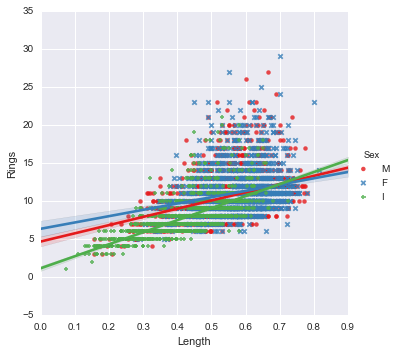

In [17]:
"""
First lets plot the relationship between three varaibles i.e. "Length", "Ring", and "Sex"
"""
sns.lmplot(x="Length", y="Rings", hue="Sex", data=abalone_df, markers=["o","x","+"], palette="Set1")

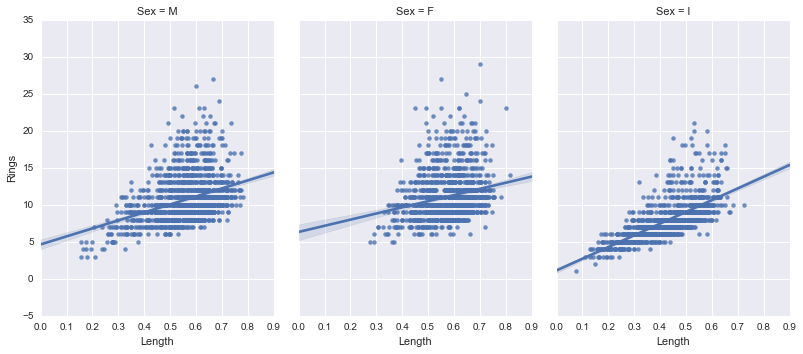

In [18]:
"""
Second lets plot the same relationship between three between variables i.e. "Length", "Rings", 
and "Sex". Not on a single Facet but on different Facets for each of Sex.
"""
sns.lmplot(x="Length", y="Rings", col="Sex", data=abalone_df, aspect=0.75)

### Step 5.3 residplot : Tool for checking plotting residuals
seaborn has made available quite useful to have a quick look inside the dataset if linear regression is really a good fit as a model for the dataset. This function firsts fits a simple linear regression and then plots the residuals (difference between actual values and predicted values according to the fit) around y = 0. If output of such a plots shows some patterns for sure linear regression model is not complex enough to model the relationship existing in the dataset.

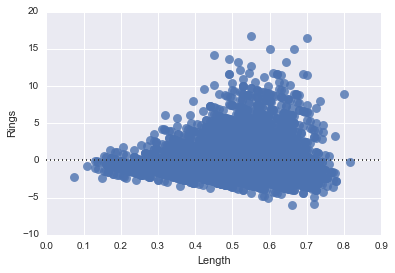

In [19]:
"""
As can be seen from the below plot that the residuals are not random, infact there exists a
pattern in the below plot. And the pattern is that as the length increases more Rings also 
increases but after some after Length 0.6 rings start to fall. Hence can be predicted that 
linear regression wont be complex enough to fit the dataset.
"""
sns.residplot(x="Length", y="Rings", data=abalone_df, scatter_kws={"s": 80})